In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import os
from scipy.spatial.transform import Rotation as Ro

plt.rc('font',family='Times New Roman')
# plt.rcParams['font.sans-serif'] = ['SimSun']  # 用来正常显示中文

plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['pdf.fonttype'] = 42

# data_base_dir = "../data/Replica/scan1"
# train_base_dir = "../exps/replica_im8_grids_1/2022_11_24_20_36_32/plots/logs"  
# N = 100
# start = 50
# end = 83

data_base_dir = "../data/Room/scan2/room_out_384"
train_base_dir = "../exps/room_im2_grids_2/2022_11_29_21_08_46/plots/logs" 
N = 200
start = 50
end = 85

### 加载位姿
gt_poses = []
noise_poses = []
for i in range(N):
    gt_pose = np.loadtxt(os.path.join(data_base_dir,str(i)+"_gt.txt"))
    noise_pose = np.loadtxt(os.path.join(data_base_dir,str(i)+"_5_5.txt"))
    gt_poses.append(gt_pose.tolist())
    noise_poses.append(noise_pose.tolist())
gt_poses = np.array(gt_poses)
noise_poses = np.array(noise_poses)

def get_pose_err(est_poses): 
    noise_loss_all_r = []
    noise_loss_all_t = []
    est_loss_all_r = []
    est_loss_all_t = []
    ## 计算loss
    for i in range(100):
        gt_r ,gt_t = gt_poses[i,:3,:3], gt_poses[i,:3,3]
        noise_r ,noise_t = noise_poses[i,:3,:3], noise_poses[i,:3,3]
        est_r ,est_t = est_poses[i,:3,:3], est_poses[i,:3,3]
        noise_loss_r = Ro.from_matrix(noise_r@np.linalg.inv(gt_r)).as_euler('ZYX', degrees=True)
        est_loss_r = Ro.from_matrix(est_r@np.linalg.inv(gt_r)).as_euler('ZYX', degrees=True)
        # print(noise_loss_r,est_loss_r)
        noise_loss_all_r.append(abs(noise_loss_r).tolist())
        est_loss_all_r.append(abs(est_loss_r).tolist())
        noise_loss_all_t.append(abs(gt_t-noise_t).tolist())
        est_loss_all_t.append(abs(gt_t-est_t).tolist())

    noise_loss_all_r = np.array(noise_loss_all_r)
    noise_loss_all_t = np.array(noise_loss_all_t)
    est_loss_all_r = np.array(est_loss_all_r)
    est_loss_all_t = np.array(est_loss_all_t)

    noise_err_all_r = np.mean(np.linalg.norm(noise_loss_all_r,axis=1))
    est_err_all_r = np.mean(np.linalg.norm(est_loss_all_r,axis=1))
    print("r_err = ",noise_err_all_r,"------->",est_err_all_r)
    noise_err_all_t = np.mean(np.linalg.norm(noise_loss_all_t,axis=1))
    est_err_all_t = np.mean(np.linalg.norm(est_loss_all_t,axis=1))
    print("t_err = ",noise_err_all_t,"------->",est_err_all_t)
    return est_err_all_r, est_err_all_t


err_r_list = []
err_t_list = []
index = []
for i in range(start,end,10):
    # print(i)
    index.append(i)
    est_poses = np.loadtxt(os.path.join(train_base_dir,str(i)+"_pose.txt")).reshape(N,4,4)
    err_r, err_t = get_pose_err(est_poses)
    err_r_list.append(err_r)
    err_t_list.append(err_t)
index = np.array(index)
index = (index-start)*N*10
err_r_arr = np.array(err_r_list)
err_t_arr = np.array(err_t_list)*100

r_err =  4.840005961255826 -------> 4.840005961255826
t_err =  0.011533617498001563 -------> 0.011533617498001563
r_err =  4.840005961255826 -------> 1.9495223909869557
t_err =  0.011533617498001563 -------> 0.017839670713682688
r_err =  4.840005961255826 -------> 1.7404032291880938
t_err =  0.011533617498001563 -------> 0.0170420617801057
r_err =  4.840005961255826 -------> 1.662412269136235
t_err =  0.011533617498001563 -------> 0.016201231847417518


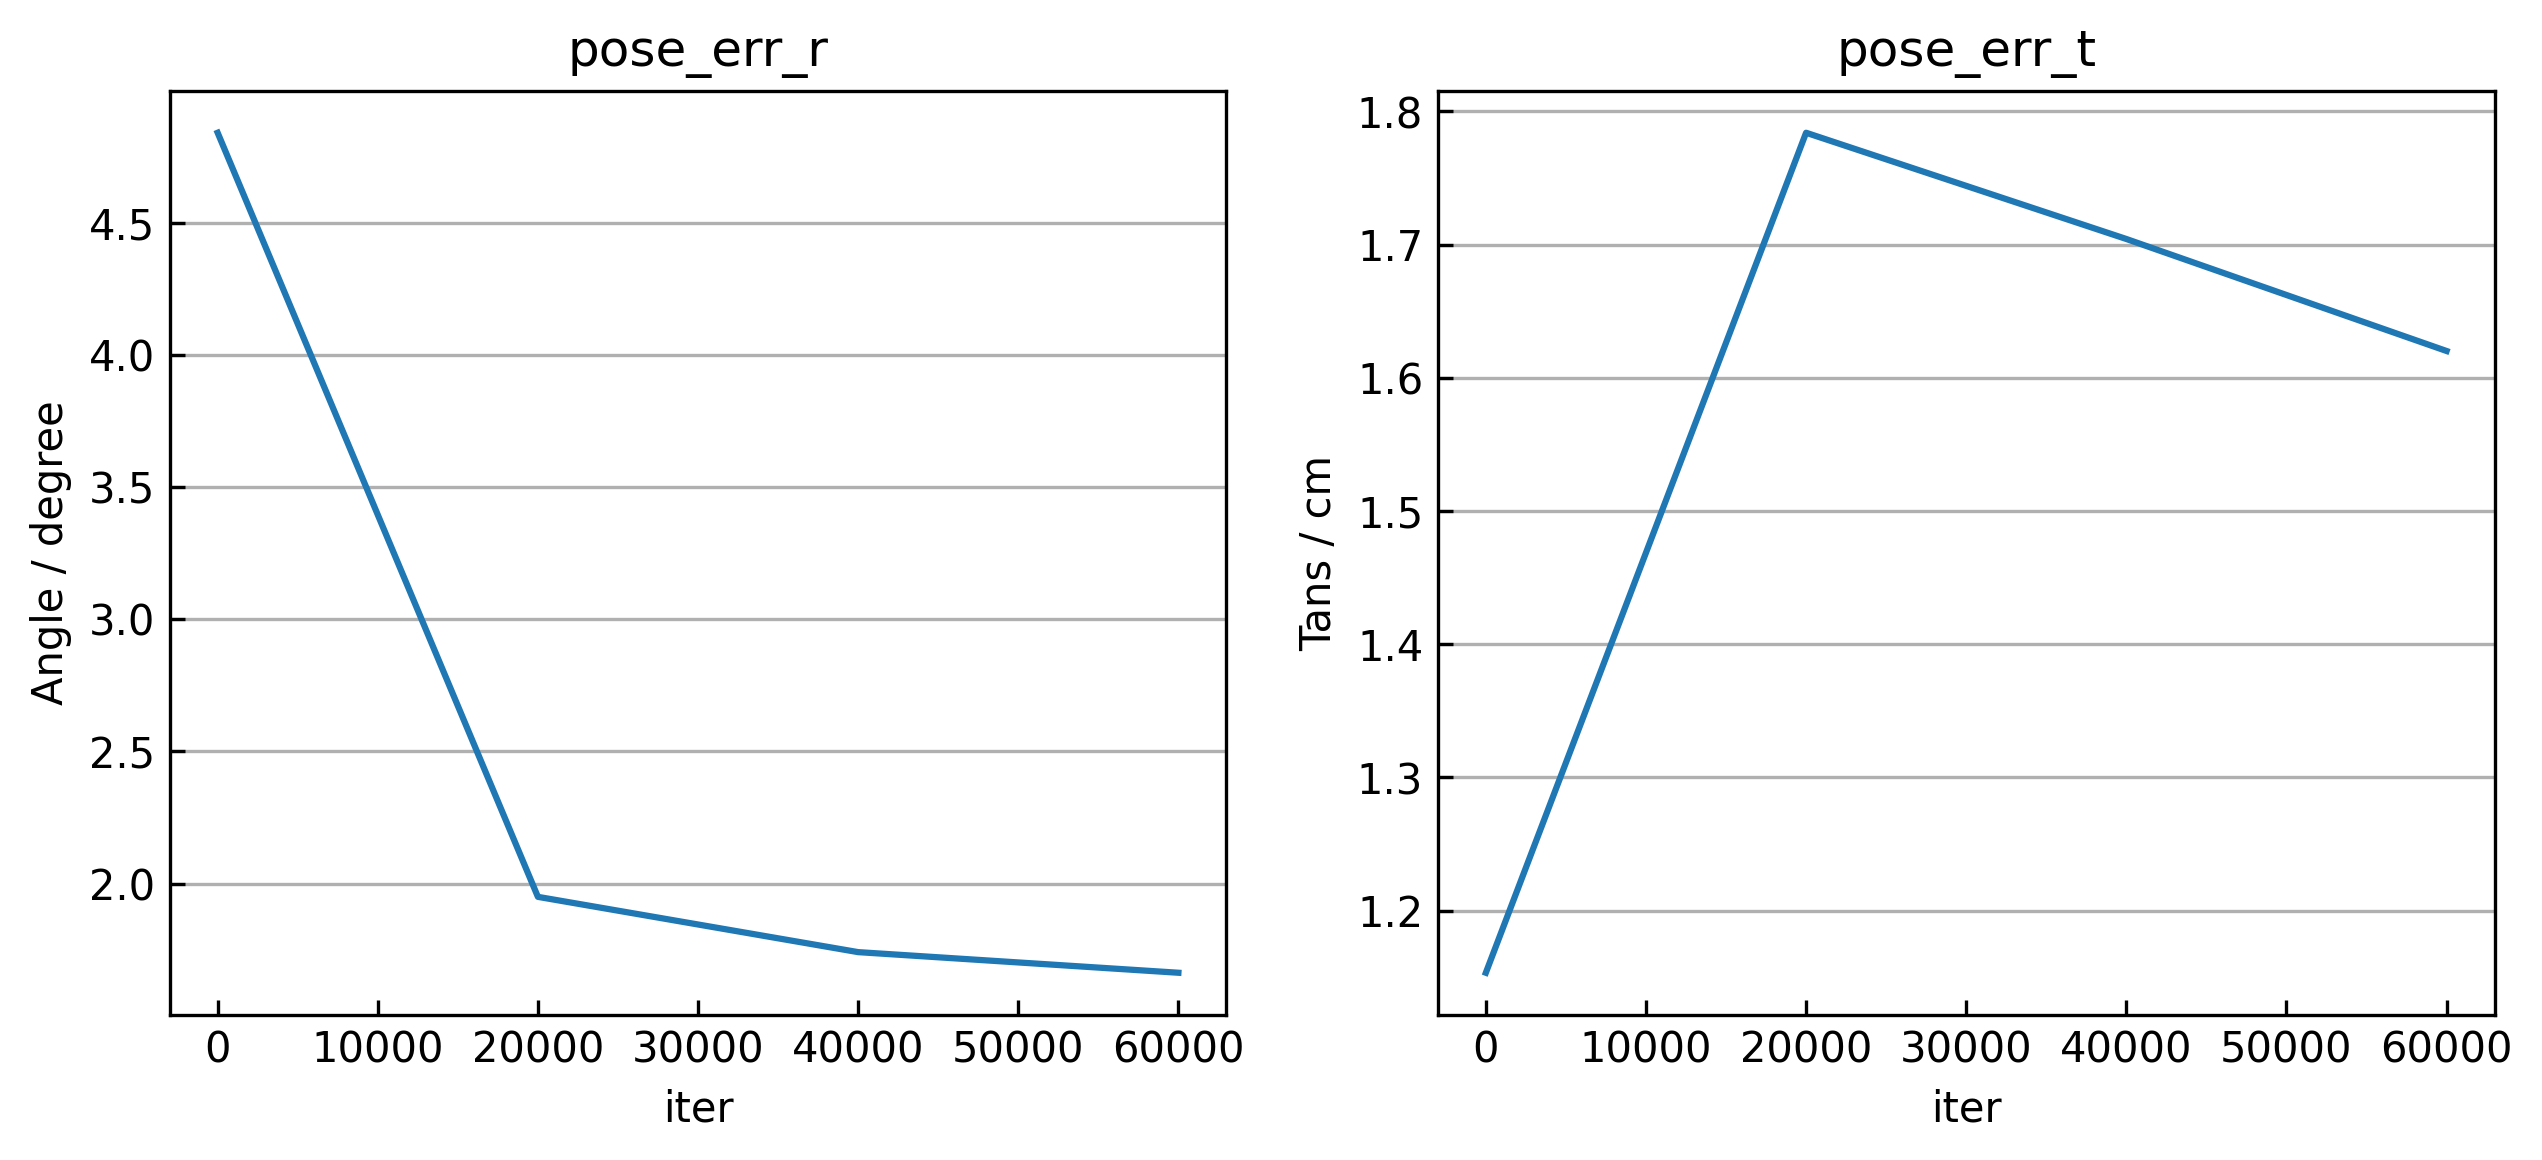

In [4]:
from matplotlib.pyplot import title


fig = plt.figure(dpi=300,figsize=(10,4))

ax = fig.add_subplot(121)
ax.plot(index,err_r_arr)
ax.grid(axis='y')
ax.set_xlabel("iter")
ax.set_ylabel("Angle / degree")
ax.set_title("pose_err_r")

ax = fig.add_subplot(122)
ax.plot(index,err_t_arr)
ax.grid(axis='y')
ax.set_xlabel("iter")
ax.set_ylabel("Tans / cm")
ax.set_title("pose_err_t")


fig.savefig("pose_err.jpg",dpi=300, bbox_inches = 'tight')

plt.show()

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import os
from scipy.spatial.transform import Rotation as Ro
import imageio.v2 as imageio

base_dir = "../exps/l435_rgbd_grids_4/2022_10_28_19_03_39/plots/test_all"
savePath = "../exps/l435_rgbd_grids_4/2022_10_28_19_03_39/plots/test_all"
rgb_list = []
depth_list = []
normal_list = []
for i in range(36):
    rgb = imageio.imread(os.path.join(base_dir,f"rendering_100_{i}.png"))
    depth = imageio.imread(os.path.join(base_dir,f"depth_100_{i}.png"))
    normal = imageio.imread(os.path.join(base_dir,f"normal_100_{i}.png"))
    rgb_list.append(rgb)
    depth_list.append(depth)
    normal_list.append(normal)


writer = imageio.get_writer(f'{savePath}/rgb_video.mp4', fps=5)
for i in range(len(rgb_list)):
    writer.append_data(rgb_list[i])
writer.close()

writer = imageio.get_writer(f'{savePath}/depth_video.mp4', fps=5)
for i in range(len(depth_list)):
    writer.append_data(depth_list[i])
writer.close()


writer = imageio.get_writer(f'{savePath}/normal_video.mp4', fps=5)
for i in range(len(normal_list)):
    writer.append_data(normal_list[i])
writer.close()



